In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## EDA:

In [198]:
df = pd.read_excel('flight_price_data.xlsx',index_col=0)

In [199]:
df

,Airline Name,Date of journey,Source,Destination,Departure Time,Arrival Time,Duration,Total stops,Price
0,Go First,7 oct 2022,New Delhi,Mumbai,13:20,15:20,2h 00m,Non Stop,"5,950"
1,Go First,7 oct 2022,New Delhi,Mumbai,15:15,17:20,2h 05m,Non Stop,"5,950"
2,Go First,7 oct 2022,New Delhi,Mumbai,07:00,09:10,2h 10m,Non Stop,"5,950"
3,SpiceJet,7 oct 2022,New Delhi,Mumbai,07:20,09:35,2h 15m,Non Stop,"5,950"
4,Go First,7 oct 2022,New Delhi,Mumbai,18:20,20:35,2h 15m,Non Stop,"5,950"
...,...,...,...,...,...,...,...,...,...
1693,Vistara,12 oct 2022,Bangalore,Kolkata,11:30,19:35,8h 05m,2 Stop(s),"20,074"
1694,Air India,12 oct 2022,Bangalore,Kolkata,06:10,14:30,8h 20m,1 Stop,"21,124"
1695,Air India,12 oct 2022,Bangalore,Kolkata,11:15,19:10,7h 55m,1 Stop,"23,224"
1696,Air India,12 oct 2022,Bangalore,Kolkata,06:10,19:10,13h 00m,1 Stop,"23,224"


In [200]:
#Column Data type in dataframe 
df.dtypes

Airline Name       object
Date of journey    object
Source             object
Destination        object
Departure Time     object
Arrival Time       object
Duration           object
Total stops        object
Price              object
dtype: object

In [201]:
#Converting duration (in form of hour and min) to minute form
df['Duration'] = [(float(j.replace('h','m').split("m")[0]) * 60 + float(j.replace('h','m').split("m")[1])) for j in df['Duration']]

In [202]:
#Converting 'Departure Time' from object to datetime datatype
df['Departure Time'] = pd.to_datetime(df['Departure Time'], format='%H:%M').dt.time

In [203]:
#Cleaning 'Arrival Time' and converting it from object to datetime datatype
df['Arrival Time'] = [j.replace('+ 1 day','').strip() for j in df['Arrival Time']]
df['Arrival Time'] = [j.replace('+ 2 days','').strip() for j in df['Arrival Time']]
df['Arrival Time'] = pd.to_datetime(df['Arrival Time'], format='%H:%M').dt.time

In [204]:
#Converting 'Price' from object to float datatype
df['Price'] = [j.replace(',','') for j in df['Price']]
df['Price'] = df['Price'].astype('float')

In [205]:
df

,Airline Name,Date of journey,Source,Destination,Departure Time,Arrival Time,Duration,Total stops,Price
0,Go First,7 oct 2022,New Delhi,Mumbai,13:20:00,15:20:00,120.0,Non Stop,5950.0
1,Go First,7 oct 2022,New Delhi,Mumbai,15:15:00,17:20:00,125.0,Non Stop,5950.0
2,Go First,7 oct 2022,New Delhi,Mumbai,07:00:00,09:10:00,130.0,Non Stop,5950.0
3,SpiceJet,7 oct 2022,New Delhi,Mumbai,07:20:00,09:35:00,135.0,Non Stop,5950.0
4,Go First,7 oct 2022,New Delhi,Mumbai,18:20:00,20:35:00,135.0,Non Stop,5950.0
...,...,...,...,...,...,...,...,...,...
1693,Vistara,12 oct 2022,Bangalore,Kolkata,11:30:00,19:35:00,485.0,2 Stop(s),20074.0
1694,Air India,12 oct 2022,Bangalore,Kolkata,06:10:00,14:30:00,500.0,1 Stop,21124.0
1695,Air India,12 oct 2022,Bangalore,Kolkata,11:15:00,19:10:00,475.0,1 Stop,23224.0
1696,Air India,12 oct 2022,Bangalore,Kolkata,06:10:00,19:10:00,780.0,1 Stop,23224.0


#### Point to note here is that all columns are not numeric

In [206]:
#Statistical summary
df.describe()

,Duration,Price
count,1698.000000,1698.000000
mean,597.326266,12468.618375
std,480.445072,5897.449152
min,115.000000,5672.000000
25%,260.000000,8579.000000
50%,410.000000,10962.000000
75%,820.000000,15479.500000
max,2410.000000,36932.000000


In [207]:
df.shape

(1698, 9)

#### We have 1698 data rows and 9 columns in the dataframe.

### Target variable is 'Price'

### Checking Null values in Training Dataframe:

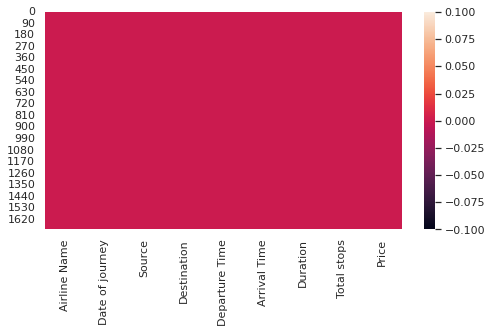

In [208]:
#Checking null values using heatmap
sns.set(rc={'figure.figsize':(8,4)})
sns.heatmap(df.isnull())
plt.show()

In [209]:
#Total number of null values in complete dataset
df.isnull().sum().sum()

0

In [210]:
#number of null values in each column
df.isnull().sum()

Airline Name       0
Date of journey    0
Source             0
Destination        0
Departure Time     0
Arrival Time       0
Duration           0
Total stops        0
Price              0
dtype: int64

#### As we can see there are no NULL values in dataframe

### Histogram Plots :

In [211]:
#Making dataframe of nominal data
df_visualisation_nominal = df[['Airline Name','Date of journey','Source','Destination','Total stops']].copy()

IndiGo       514
Air India    442
Vistara      418
Air Asia     143
Go First     131
SpiceJet      50
Name: Airline Name, dtype: int64


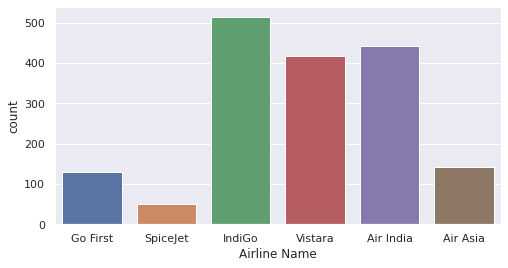

In [212]:
#Visualisation of Airline Name data
ax = sns.countplot(x='Airline Name',data=df_visualisation_nominal)
print(df_visualisation_nominal['Airline Name'].value_counts())

**As we can see most flights are of Indigo airlines between the source and destinations**

7 oct 2022     291
10 oct 2022    283
12 oct 2022    282
8 oct 2022     281
11 oct 2022    281
9 oct 2022     280
Name: Date of journey, dtype: int64


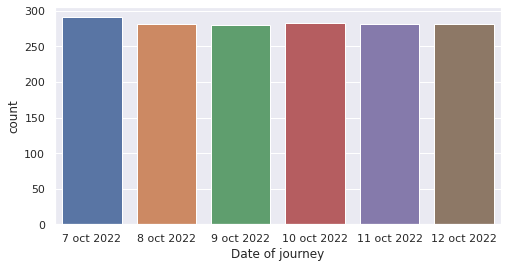

In [213]:
#Visualisation of Date of journey data
ax = sns.countplot(x='Date of journey',data=df_visualisation_nominal)
print(df_visualisation_nominal['Date of journey'].value_counts())

**As we can see that there are almost equal number of flights every day**

New Delhi    955
Bangalore    743
Name: Source, dtype: int64


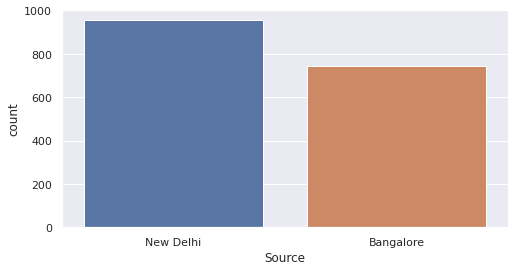

In [214]:
#Visualisation of Source data
sns.set(rc={'figure.figsize':(8,4)})
ax = sns.countplot(x='Source',data=df_visualisation_nominal)
print(df_visualisation_nominal['Source'].value_counts())

**There are more flights from Delhi to Mumbai than Bangalore to Kolkata from 7 oct 2022 to 12 oct 2022**

Mumbai     955
Kolkata    743
Name: Destination, dtype: int64


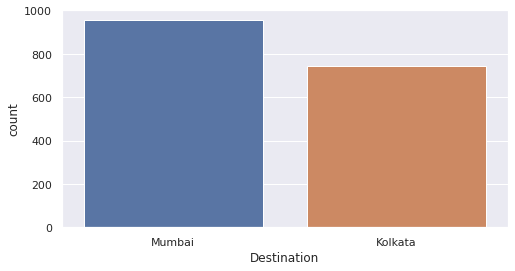

In [215]:
#Visualisation of Destination data
ax = sns.countplot(x='Destination',data=df_visualisation_nominal)
print(df_visualisation_nominal['Destination'].value_counts())

**There are more flights to Delhi to Mumbai than Bangalore to Kolkata from 7 oct 2022 to 12 oct 2022**

1 Stop       1158
Non Stop      398
2 Stop(s)     113
3 Stop(s)      29
Name: Total stops, dtype: int64


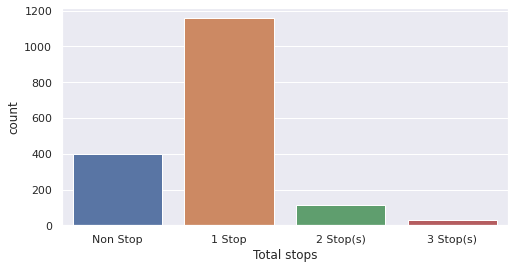

In [216]:
#Visualisation of Total stops data
ax = sns.countplot(x='Total stops',data=df_visualisation_nominal)
print(df_visualisation_nominal['Total stops'].value_counts())

**Most are 1 stop flights and least are 3 stop flights.**

### Density Plots:

In [217]:
#Making dataframe of Continous data
df_visualisation_continous = df[['Duration','Price']].copy()

<AxesSubplot:xlabel='Duration', ylabel='Density'>

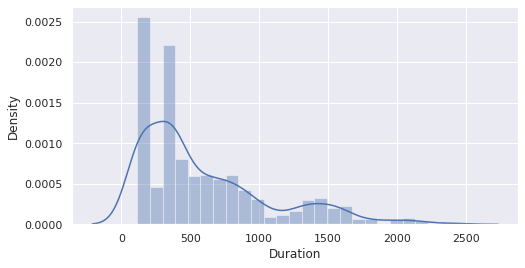

In [218]:
#Visualisation of Duration data
sns.distplot(df_visualisation_continous['Duration'])

**Above graph looks skewed right with mode around 250 minutes**

<AxesSubplot:xlabel='Price', ylabel='Density'>

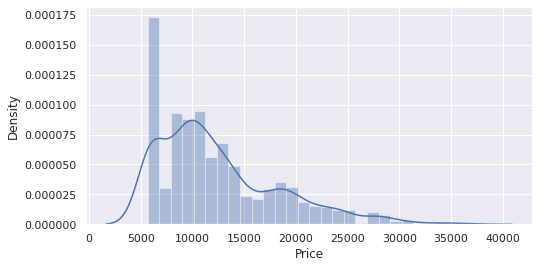

In [219]:
#Visualisation of Price data
sns.distplot(df_visualisation_continous['Price'])

**Above graph looks skewed right with mode around ₹5,000**

### Some important plots:

<AxesSubplot:xlabel='Date of journey', ylabel='Price'>

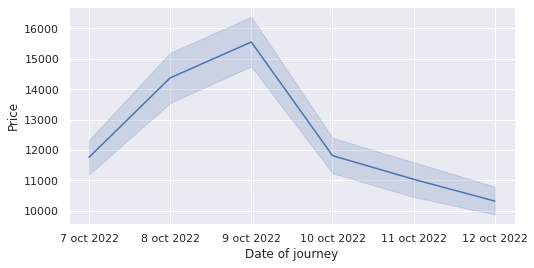

In [222]:
#Plotting Price vs Date of journey
sns.lineplot(x = df['Date of journey'], y = df['Price'], data = df)

**As we can see that more the difference between date of booking and date of journey, lesser will be the flight price**

<AxesSubplot:xlabel='Airline Name', ylabel='Price'>

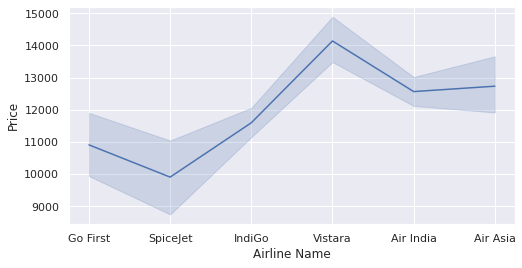

In [223]:
#Plotting Price vs Airline Name
sns.lineplot(x = df['Airline Name'], y = df['Price'], data = df)

**As we can see cheapest flight is Spicejet and most expensive is Vistara**

<AxesSubplot:xlabel='Departure Time', ylabel='Price'>

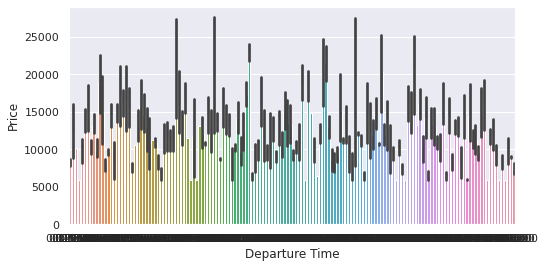

In [228]:
# Creating df1 with departure time in ascending order and then plotting it with price
df1 = df.sort_values(by=['Departure Time'], ascending=True)
sns.barplot(x = df1['Departure Time'], y = df1['Price'],data = df1)

In [229]:
df1

,Airline Name,Date of journey,Source,Destination,Departure Time,Arrival Time,Duration,Total stops,Price
240,IndiGo,8 oct 2022,New Delhi,Mumbai,00:15:00,05:30:00,315.0,1 Stop,9393.0
543,IndiGo,10 oct 2022,New Delhi,Mumbai,00:15:00,05:30:00,315.0,1 Stop,7805.0
370,IndiGo,9 oct 2022,New Delhi,Mumbai,00:15:00,05:30:00,315.0,1 Stop,7805.0
860,IndiGo,12 oct 2022,New Delhi,Mumbai,00:15:00,05:30:00,315.0,1 Stop,7913.0
701,IndiGo,11 oct 2022,New Delhi,Mumbai,00:15:00,05:30:00,315.0,1 Stop,7913.0
...,...,...,...,...,...,...,...,...,...
813,IndiGo,12 oct 2022,New Delhi,Mumbai,23:35:00,01:40:00,125.0,Non Stop,5954.0
495,IndiGo,10 oct 2022,New Delhi,Mumbai,23:35:00,01:40:00,125.0,Non Stop,5954.0
1475,Air Asia,11 oct 2022,Bangalore,Kolkata,23:35:00,02:05:00,150.0,Non Stop,8839.0
968,Air Asia,7 oct 2022,Bangalore,Kolkata,23:35:00,02:05:00,150.0,Non Stop,8839.0


**As we can see that prices vary every hour throughout the day.**

#### Visualisation is completed

### Encoding of Both training and testing Dataframe(Converting String to numeric):

In [230]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [231]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [232]:
df

,Airline Name,Date of journey,Source,Destination,Departure Time,Arrival Time,Duration,Total stops,Price
0,2.0,3.0,1.0,1.0,73.0,84.0,120.0,3.0,5950.0
1,2.0,3.0,1.0,1.0,89.0,100.0,125.0,3.0,5950.0
2,2.0,3.0,1.0,1.0,27.0,39.0,130.0,3.0,5950.0
3,4.0,3.0,1.0,1.0,30.0,41.0,135.0,3.0,5950.0
4,2.0,3.0,1.0,1.0,114.0,131.0,135.0,3.0,5950.0
...,...,...,...,...,...,...,...,...,...
1693,5.0,2.0,0.0,0.0,61.0,121.0,485.0,1.0,20074.0
1694,1.0,2.0,0.0,0.0,18.0,79.0,500.0,0.0,21124.0
1695,1.0,2.0,0.0,0.0,60.0,117.0,475.0,0.0,23224.0
1696,1.0,2.0,0.0,0.0,18.0,117.0,780.0,0.0,23224.0


### Correlations:

<AxesSubplot:>

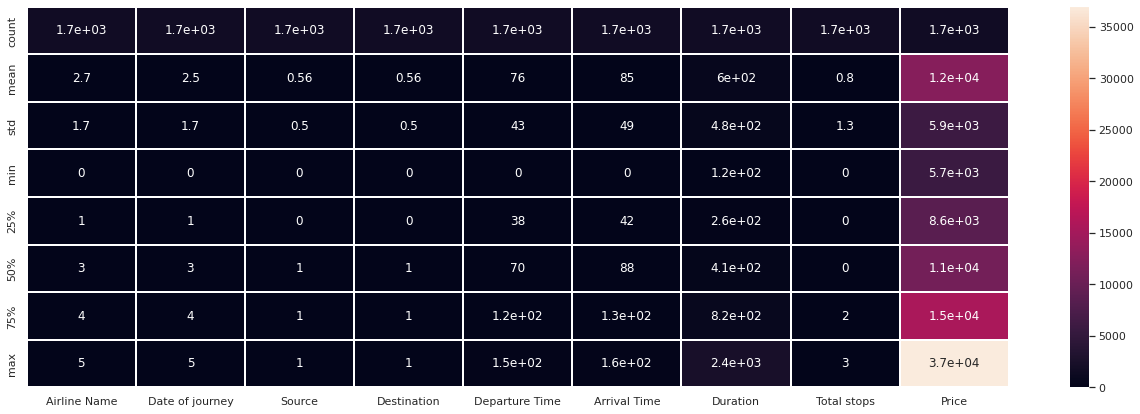

In [233]:
plt.figure(figsize = (22,7))
sns.heatmap(df.describe(),annot = True, linewidths=0.1)

In [234]:
#Correlation matrix
df.corr()

,Airline Name,Date of journey,Source,Destination,Departure Time,Arrival Time,Duration,Total stops,Price
Airline Name,1.000000,0.044360,-0.107583,-0.107583,0.071250,-0.011711,-0.002427,0.142032,0.076250
Date of journey,0.044360,1.000000,-0.003354,-0.003354,0.014739,-0.008223,-0.006704,-0.017254,0.247551
Source,-0.107583,-0.003354,1.000000,1.000000,0.000713,0.032234,-0.214544,0.107323,-0.521240
Destination,-0.107583,-0.003354,1.000000,1.000000,0.000713,0.032234,-0.214544,0.107323,-0.521240
Departure Time,0.071250,0.014739,0.000713,0.000713,1.000000,-0.019676,-0.035341,0.099779,-0.096318
Arrival Time,-0.011711,-0.008223,0.032234,0.032234,-0.019676,1.000000,0.027992,-0.029555,0.137427
Duration,-0.002427,-0.006704,-0.214544,-0.214544,-0.035341,0.027992,1.000000,-0.401444,0.376862
Total stops,0.142032,-0.017254,0.107323,0.107323,0.099779,-0.029555,-0.401444,1.000000,-0.400225
Price,0.076250,0.247551,-0.521240,-0.521240,-0.096318,0.137427,0.376862,-0.400225,1.000000


<AxesSubplot:>

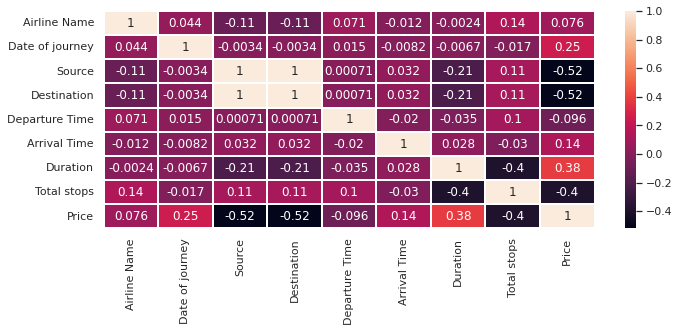

In [235]:
#Correlation of Columns with target column using heatmap
plt.figure(figsize = (11,4))
sns.heatmap(df.corr(),annot = True, linewidths=0.1)

#### Here we can't see very high correlations as highest correlation present here is -0.52.

### Checking columns which appear to be highly correlated with target columns

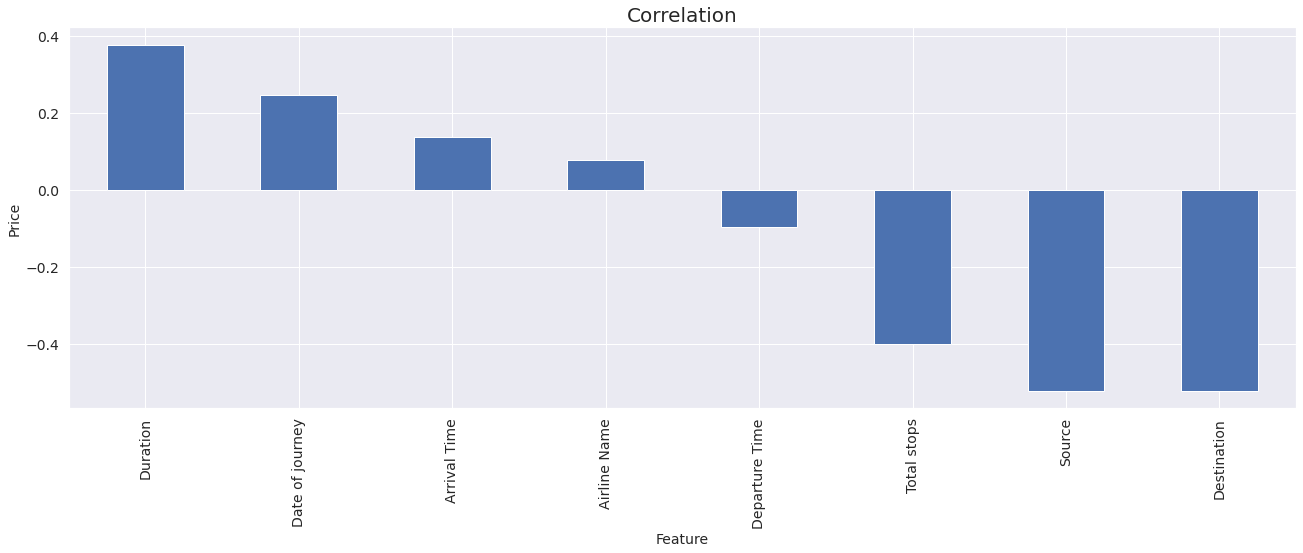

In [236]:
plt.figure(figsize=(22,7))
df.corr()['Price'].sort_values(ascending = False).drop(['Price']).plot(kind='bar',fontsize=14)
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.title('Correlation',fontsize=20)
plt.show()

#### Here we can't see any high correlation with target column

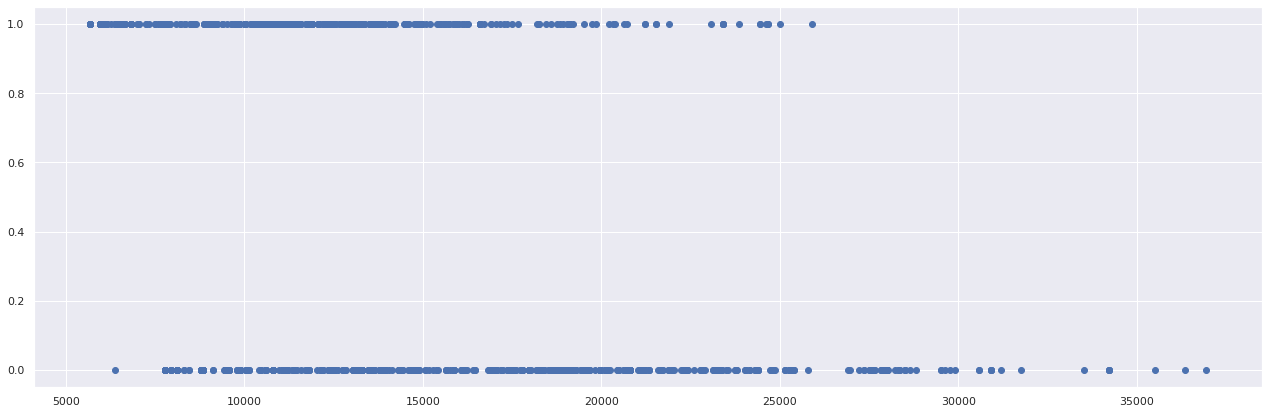

In [237]:
#Checking correlation between Price and Destination
plt.figure(figsize=(22,7))
plt.scatter(df['Price'],df['Destination'])
plt.show()

#### We can't see any high correlations here

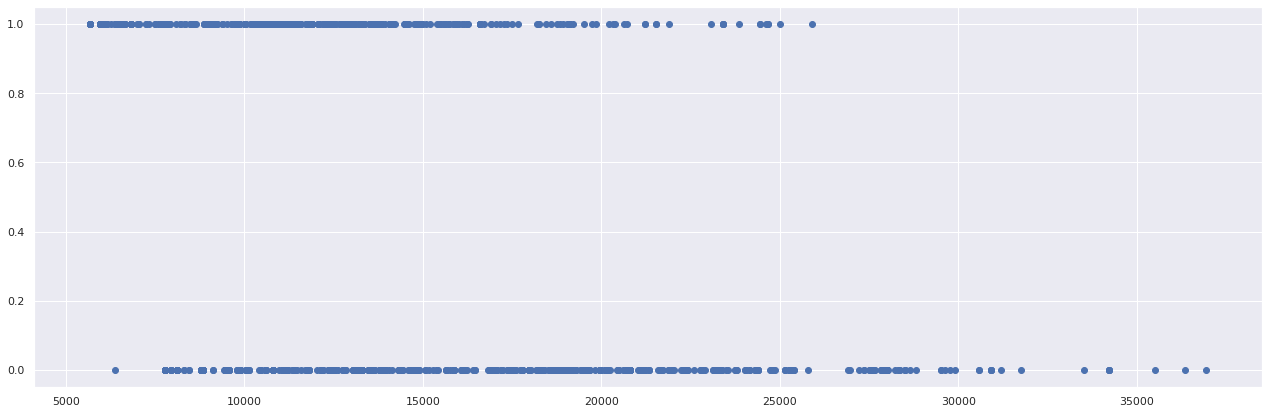

In [238]:
#Checking correlation between Price and Source
plt.figure(figsize=(22,7))
plt.scatter(df.Price,df.Source)
plt.show()

#### We can't see any high collinearity here

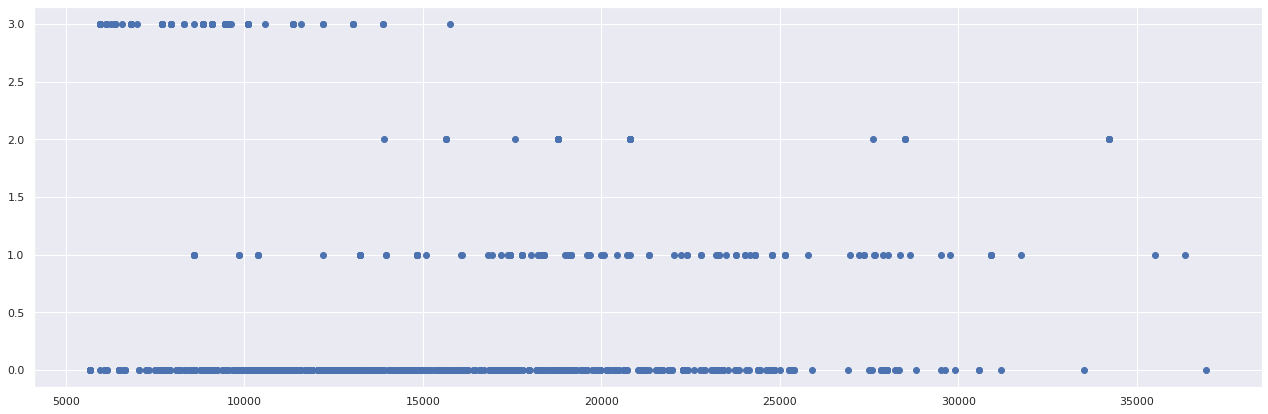

In [239]:
#Checking correlation between Price and Total Stops
plt.figure(figsize=(22,7))
plt.scatter(df.Price,df['Total stops'])
plt.show()

#### We can't see any high collinearity here

### Checkin VIF for confirmation of above conclusion:

In [240]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [241]:
X1 = df[['Price', 'Destination']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X1.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X1.values, i)
                          for i in range(len(X1.columns))]

In [242]:
print(vif_dF)

       feature       VIF
0        Price  1.391839
1  Destination  1.391839


### As we can see there is no high correlation(<10)

In [243]:
X2 = df[['Price','Source']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X2.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]

In [244]:
print(vif_dF)

  feature       VIF
0   Price  1.391839
1  Source  1.391839


### As we can see here correlation is not high (<10)

In [245]:
X3 = df[['Price','Total stops']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X3.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X3.values, i)
                          for i in range(len(X3.columns))]

In [246]:
print(vif_dF)

       feature       VIF
0        Price  1.131345
1  Total stops  1.131345


### As we can see here correlation is not high (<10)

### Removing Skewness :

In [247]:
#Checking skewness
df.skew()

Airline Name       0.074181
Date of journey   -0.002342
Source            -0.251897
Destination       -0.251897
Departure Time     0.079896
Arrival Time       0.004694
Duration           1.266091
Total stops        1.069084
Price              1.124543
dtype: float64

#### Acceptable skewness (-0.65,+0.65)

In [248]:
#Removing skewness from 'Duration'
from scipy.stats import boxcox
df['Duration'] = boxcox(df['Duration'])[0]

In [249]:
#Checking skewness
df.skew()

Airline Name       0.074181
Date of journey   -0.002342
Source            -0.251897
Destination       -0.251897
Departure Time     0.079896
Arrival Time       0.004694
Duration           0.000475
Total stops        1.069084
Price              1.124543
dtype: float64

#### All continous columns (excluding target variable) are now in acceptable skew range 

### Removing outliers :

In [250]:
#Outlier check
df.dtypes

Airline Name       float64
Date of journey    float64
Source             float64
Destination        float64
Departure Time     float64
Arrival Time       float64
Duration           float64
Total stops        float64
Price              float64
dtype: object

Airline Name          AxesSubplot(0.125,0.657941;0.227941x0.222059)
Date of journey    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Source             AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Destination           AxesSubplot(0.125,0.391471;0.227941x0.222059)
Departure Time     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Arrival Time       AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Duration                 AxesSubplot(0.125,0.125;0.227941x0.222059)
Total stops           AxesSubplot(0.398529,0.125;0.227941x0.222059)
Price                 AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

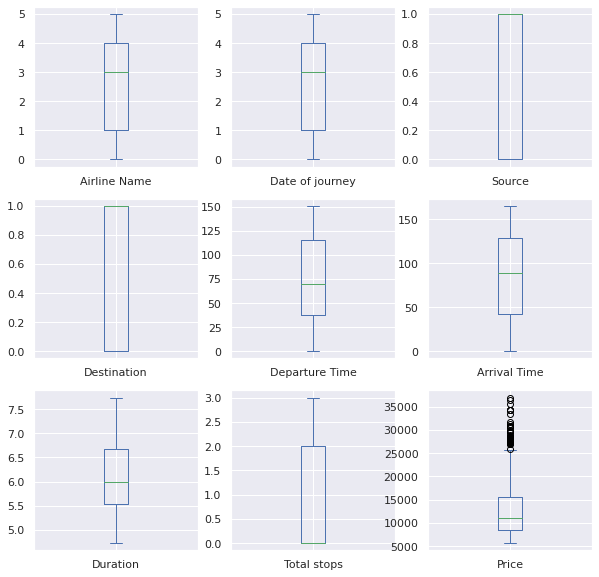

In [251]:
#Checking only for continous data types
df.plot.box(layout =(3,3),subplots=True,figsize=(10,10))

### There looks like outliers in some columns so now we check with z-score:

In [252]:
#Outlier removal using z-score
df.shape

(1698, 9)

In [253]:
from scipy.stats import zscore

z = np.abs(zscore(df))
threshhold = 3
np.where(z>3)

(array([1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1320, 1321, 1322,
        1323, 1324, 1325, 1326, 1327]),
 array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]))

#### We can see that outliers are only in target variable and hence no need to remove them

## Separating the columns into features and target for 'Price' target variable:

In [254]:
feature = df.drop("Price",axis=1)
target = df["Price"]

In [255]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [256]:
import warnings
warnings.filterwarnings('ignore')

### Model 1:

In [257]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [258]:
for i in range(0,10):
    features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = i)
    lr.fit(features_train,target_train)
    pred_train = lr.predict(features_train)
    pred_test = lr.predict(features_test)
    print("At random state " + str(i) + " the training accuracy is : " + str(r2_score(target_train,pred_train)))
    print("At random state " + str(i) + " the testing accuracy is : " + str(r2_score(target_test,pred_test)))
    print("\n")

At random state 0 the training accuracy is : 0.4999706131691889
At random state 0 the testing accuracy is : 0.54760429388812


At random state 1 the training accuracy is : 0.5144345576355316
At random state 1 the testing accuracy is : 0.491169381512341


At random state 2 the training accuracy is : 0.5193051741994703
At random state 2 the testing accuracy is : 0.4796140830696175


At random state 3 the training accuracy is : 0.5236293928202564
At random state 3 the testing accuracy is : 0.45485065280865167


At random state 4 the training accuracy is : 0.5061153271322764
At random state 4 the testing accuracy is : 0.5247732989577849


At random state 5 the training accuracy is : 0.5147931304495279
At random state 5 the testing accuracy is : 0.491763099191843


At random state 6 the training accuracy is : 0.5112606024082165
At random state 6 the testing accuracy is : 0.5041808327830714


At random state 7 the training accuracy is : 0.5052200130141907
At random state 7 the testing accura

In [259]:
features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = 9)

In [260]:
lr.fit(features_train,target_train)

LinearRegression()

In [261]:
pred_test = lr.predict(features_test)

In [262]:
print(r2_score(target_test,pred_test))

0.5056275585665697


### Cross Validation of model:

In [263]:
Train_accuracy = r2_score(target_train,pred_train)
Test_accuracy = r2_score(target_test,pred_test)

In [264]:
for j in range(2,10):
    cv_score = cross_val_score(lr,feature,target,cv=j)
    cv_mean = cv_score.mean()
    print("At cross fold " + str(j) + " the cv score is " + str(cv_mean) + " and accuracy score for training is " + str(Train_accuracy) + " and accuracy score for testing is " + str(Test_accuracy))
    print("\n")

At cross fold 2 the cv score is -0.27279517505298084 and accuracy score for training is 0.5116297288576696 and accuracy score for testing is 0.5056275585665697


At cross fold 3 the cv score is 0.1639412138763581 and accuracy score for training is 0.5116297288576696 and accuracy score for testing is 0.5056275585665697


At cross fold 4 the cv score is 0.10744496808150619 and accuracy score for training is 0.5116297288576696 and accuracy score for testing is 0.5056275585665697


At cross fold 5 the cv score is -0.06274895911063919 and accuracy score for training is 0.5116297288576696 and accuracy score for testing is 0.5056275585665697


At cross fold 6 the cv score is 0.049235321534024636 and accuracy score for training is 0.5116297288576696 and accuracy score for testing is 0.5056275585665697


At cross fold 7 the cv score is -0.05847957887325726 and accuracy score for training is 0.5116297288576696 and accuracy score for testing is 0.5056275585665697


At cross fold 8 the cv score is

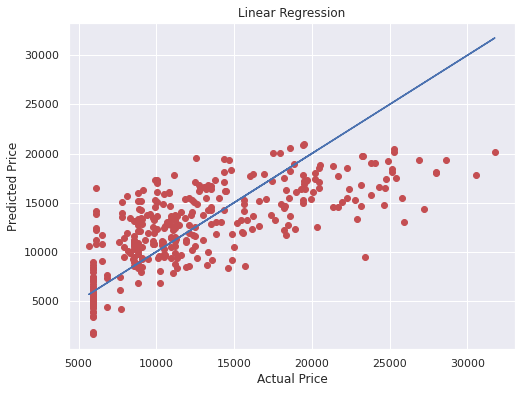

In [265]:
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test, color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression')
plt.show()

We can see almost all points lie near best fit curve but still there is lot of error present

### Regularization using Lasso:

In [266]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [267]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [268]:
ls = Lasso(alpha = 10, random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)

lss = r2_score(target_test,pred_ls)
lss

0.5054580891734664

In [269]:
cv_score = cross_val_score(ls,feature,target,cv=6)
cv_mean =cv_score.mean()
abs(cv_mean)

0.050022738216783304

### Trying other models:

In [270]:
def model_selection(algorithm_instance,features_train,target_train,features_test,target_test):
    algorithm_instance.fit(features_train,target_train)
    model_1_pred_train = algorithm_instance.predict(features_train)
    model_1_pred_test = algorithm_instance.predict(features_test)
    print("Accuracy for the training model : ",r2_score(target_train,model_1_pred_train))
    print("Accuracy for the testing model : ",r2_score(target_test,model_1_pred_test))
    
    Train_accuracy = r2_score(target_train,model_1_pred_train)
    Test_accuracy = r2_score(target_test,model_1_pred_test)
    
    for j in range(2,10):
        cv_score = cross_val_score(algorithm_instance,feature,target,cv=j)
        cv_mean = cv_score.mean()
        print("At cross fold " + str(j) + " the cv score is " + str(cv_mean) + " and accuracy score for training is " + str(Train_accuracy) + " and accuracy score for testing is " + str(Test_accuracy))
        print("\n")

### Model 2:

In [271]:
from sklearn.svm import SVR
model_selection(SVR(),features_train,target_train,features_test,target_test)

Accuracy for the training model :  -0.06459838982796096
Accuracy for the testing model :  -0.09505274350538673
At cross fold 2 the cv score is -0.9219777891331528 and accuracy score for training is -0.06459838982796096 and accuracy score for testing is -0.09505274350538673


At cross fold 3 the cv score is -0.3975006648509718 and accuracy score for training is -0.06459838982796096 and accuracy score for testing is -0.09505274350538673


At cross fold 4 the cv score is -0.3992877396228846 and accuracy score for training is -0.06459838982796096 and accuracy score for testing is -0.09505274350538673


At cross fold 5 the cv score is -0.6192748852313551 and accuracy score for training is -0.06459838982796096 and accuracy score for testing is -0.09505274350538673


At cross fold 6 the cv score is -0.5441695881051395 and accuracy score for training is -0.06459838982796096 and accuracy score for testing is -0.09505274350538673


At cross fold 7 the cv score is -0.7898266116455817 and accuracy

### Model 3:

In [272]:
from sklearn.ensemble import RandomForestRegressor
model_selection(RandomForestRegressor(),features_train,target_train,features_test,target_test)

Accuracy for the training model :  0.9741864222876007
Accuracy for the testing model :  0.7935143612983936
At cross fold 2 the cv score is -0.6683840813196462 and accuracy score for training is 0.9741864222876007 and accuracy score for testing is 0.7935143612983936


At cross fold 3 the cv score is 0.2844057093519831 and accuracy score for training is 0.9741864222876007 and accuracy score for testing is 0.7935143612983936


At cross fold 4 the cv score is 0.03817755026151326 and accuracy score for training is 0.9741864222876007 and accuracy score for testing is 0.7935143612983936


At cross fold 5 the cv score is 0.16041522068859776 and accuracy score for training is 0.9741864222876007 and accuracy score for testing is 0.7935143612983936


At cross fold 6 the cv score is 0.24713305587007717 and accuracy score for training is 0.9741864222876007 and accuracy score for testing is 0.7935143612983936


At cross fold 7 the cv score is 0.3852619514136077 and accuracy score for training is 0.9

### Model 4:

In [273]:
from sklearn.tree import DecisionTreeRegressor
model_selection(DecisionTreeRegressor(),features_train,target_train,features_test,target_test)

Accuracy for the training model :  0.9998320583184103
Accuracy for the testing model :  0.6595078023970586
At cross fold 2 the cv score is -1.070587067964743 and accuracy score for training is 0.9998320583184103 and accuracy score for testing is 0.6595078023970586


At cross fold 3 the cv score is 0.09614437261664315 and accuracy score for training is 0.9998320583184103 and accuracy score for testing is 0.6595078023970586


At cross fold 4 the cv score is -0.3509417969302106 and accuracy score for training is 0.9998320583184103 and accuracy score for testing is 0.6595078023970586


At cross fold 5 the cv score is -0.07545419114596819 and accuracy score for training is 0.9998320583184103 and accuracy score for testing is 0.6595078023970586


At cross fold 6 the cv score is -0.05848400809366513 and accuracy score for training is 0.9998320583184103 and accuracy score for testing is 0.6595078023970586


At cross fold 7 the cv score is 0.17870630223228548 and accuracy score for training is 

### Conclusion: Here RandomForestRegressor() gives best accuracy hence taking it as main model

#### Below we have tested mean squared error, Root mean squared error and Mean Absolute error method also:

In [274]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [275]:
# Mean Squared Error Method
x = RandomForestRegressor()
for i in range(0,10):
    features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = i)
    x.fit(features_train,target_train)
    pred_train = x.predict(features_train)
    pred_test = x.predict(features_test)
    print("At random state " + str(i) + " the training accuracy is : " + str(mean_squared_error(target_train,pred_train)))
    print("At random state " + str(i) + " the testing accuracy is : " + str(mean_squared_error(target_test,pred_test)))
    print("\n")

At random state 0 the training accuracy is : 976147.9764808735
At random state 0 the testing accuracy is : 5097279.187634895


At random state 1 the training accuracy is : 921278.8896914272
At random state 1 the testing accuracy is : 7142703.787995541


At random state 2 the training accuracy is : 925252.4702506954
At random state 2 the testing accuracy is : 5837705.253751506


At random state 3 the training accuracy is : 943579.8633270365
At random state 3 the testing accuracy is : 8213373.16622761


At random state 4 the training accuracy is : 967409.6128786311
At random state 4 the testing accuracy is : 5610981.762379347


At random state 5 the training accuracy is : 821440.8541532614
At random state 5 the testing accuracy is : 7783137.7350190235


At random state 6 the training accuracy is : 899186.8107389396
At random state 6 the testing accuracy is : 6217698.668733508


At random state 7 the training accuracy is : 955949.1318530369
At random state 7 the testing accuracy is : 5533

In [276]:
# Root Mean Squared Error Method

for i in range(0,10):
    features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = i)
    x.fit(features_train,target_train)
    pred_train = x.predict(features_train)
    pred_test = x.predict(features_test)
    print("At random state " + str(i) + " the training accuracy is : " + str(mean_squared_error(target_train,pred_train,squared=False)))
    print("At random state " + str(i) + " the testing accuracy is : " + str(mean_squared_error(target_test,pred_test,squared=False)))
    print("\n")

At random state 0 the training accuracy is : 984.2400710310014
At random state 0 the testing accuracy is : 2255.466025157495


At random state 1 the training accuracy is : 972.7478889964744
At random state 1 the testing accuracy is : 2676.7216930155723


At random state 2 the training accuracy is : 970.1597174047333
At random state 2 the testing accuracy is : 2421.7904808531607


At random state 3 the training accuracy is : 945.8000985677196
At random state 3 the testing accuracy is : 2841.3256612437035


At random state 4 the training accuracy is : 985.5595256903355
At random state 4 the testing accuracy is : 2441.139986941231


At random state 5 the training accuracy is : 932.4538603402027
At random state 5 the testing accuracy is : 2777.3577950912136


At random state 6 the training accuracy is : 946.3226755949188
At random state 6 the testing accuracy is : 2451.0185588410945


At random state 7 the training accuracy is : 989.6338121038177
At random state 7 the testing accuracy is :

In [277]:
# Mean Absolute Error Method

for i in range(0,10):
    features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = i)
    x.fit(features_train,target_train)
    pred_train = x.predict(features_train)
    pred_test = x.predict(features_test)
    print("At random state " + str(i) + " the training accuracy is : " + str(mean_absolute_error(target_train,pred_train)))
    print("At random state " + str(i) + " the testing accuracy is : " + str(mean_absolute_error(target_test,pred_test)))
    print("\n")

At random state 0 the training accuracy is : 614.2115763377516
At random state 0 the testing accuracy is : 1419.6730544117647


At random state 1 the training accuracy is : 595.4750419033593
At random state 1 the testing accuracy is : 1665.0655539215686


At random state 2 the training accuracy is : 600.9976693667159
At random state 2 the testing accuracy is : 1570.1090215686277


At random state 3 the training accuracy is : 590.9523188161862
At random state 3 the testing accuracy is : 1779.7627245098038


At random state 4 the training accuracy is : 598.923250736377
At random state 4 the testing accuracy is : 1528.8232500000001


At random state 5 the training accuracy is : 581.9865231958762
At random state 5 the testing accuracy is : 1727.0715221988798


At random state 6 the training accuracy is : 588.3501833578794
At random state 6 the testing accuracy is : 1554.0931284313726


At random state 7 the training accuracy is : 618.9186993127148
At random state 7 the testing accuracy is 

#### Conclusion of 4 metrics method : As we can see we got best accuracy results in r2_score among (r2_score, mse, rms,mae)

### Ensemble technique:

In [278]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#using 4 parameters
parameters = {'criterion':['mse','mae'], 'max_features': ["auto","sqrt","log2"], 'min_samples_split' : [2,5,10], 'min_samples_leaf' : [1,2,4]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [281]:
rf = RandomForestRegressor(criterion = "mse", max_features = "sqrt", min_samples_leaf = 1, min_samples_split = 2)
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print('R2 score: ', abs(rfs)*100)

rfscore = cross_val_score(ls,feature,target,cv=6)
rfc =rfscore.mean()
rfc
print('Cross Validation score: ', abs(rfc)*100)

R2 score:  80.46171189109867
Cross Validation score:  5.0022738216783305


### Conclusion : We got r2_score as 80.46% for 'Price' prediction